In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from graphviz import pipe_lines
from mlflow import catboost
from scipy.constants import precision
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
from sklearn.metrics import average_precision_score
import mlflow

mlflow.set_registry_uri('./mlruns')
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor





In [3]:
df = pd.read_csv('data/Student_Performance.csv')

In [4]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [5]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
df["Performance Index"].mean()

55.2248

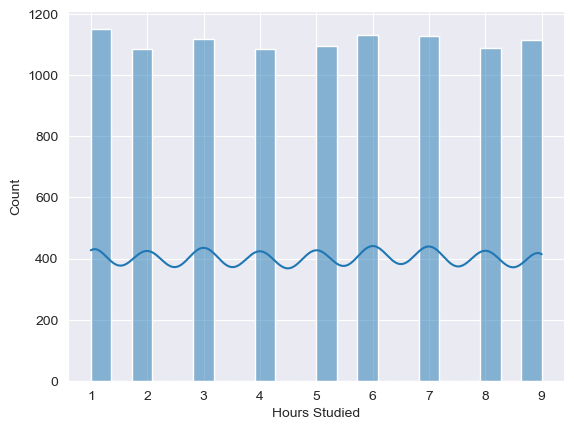

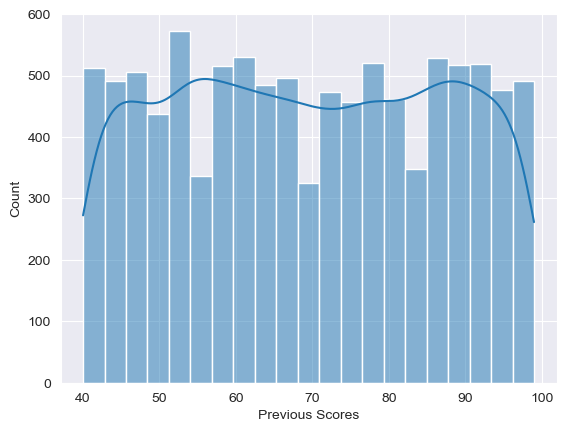

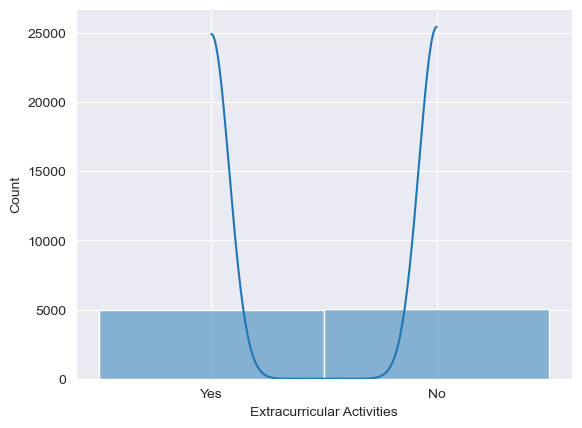

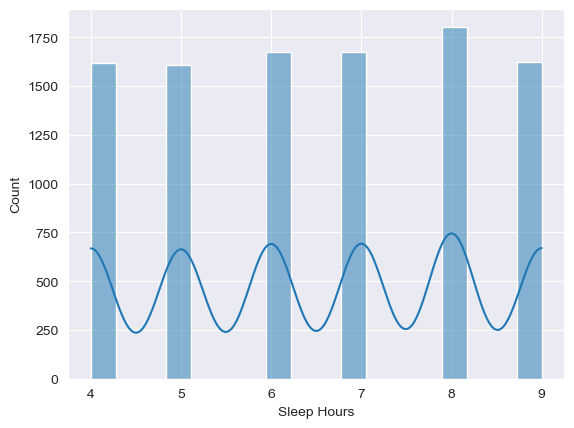

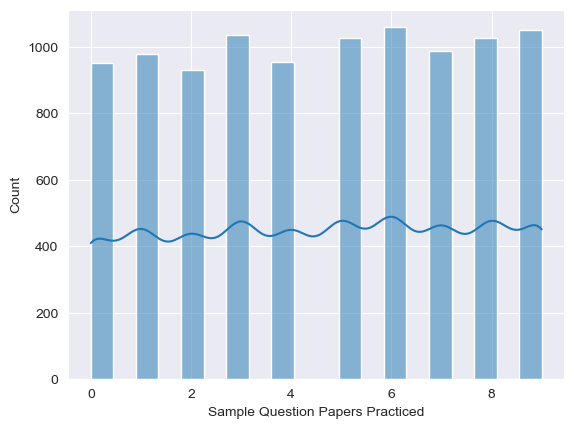

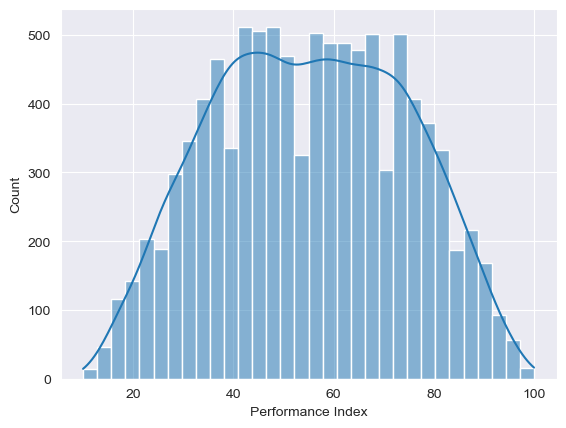

In [7]:
for col in df.columns:
    sns.histplot(data = df, x=col, kde=30)
    plt.show()

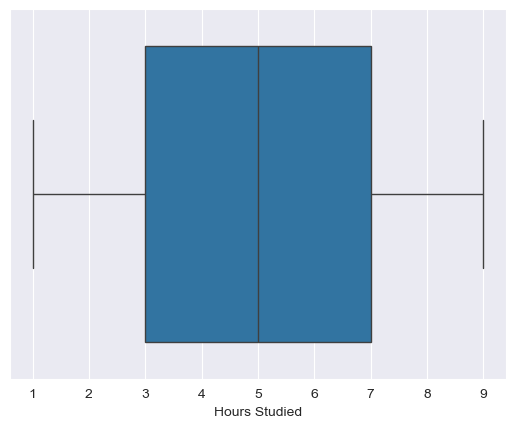

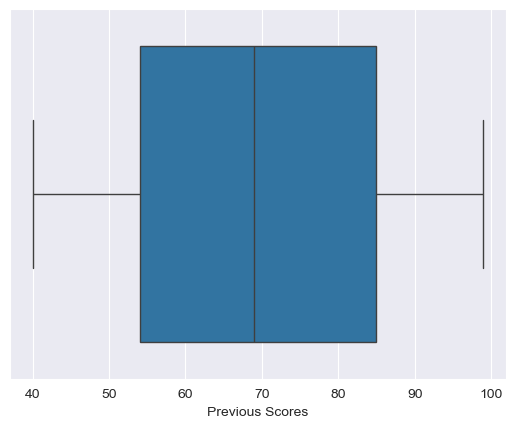

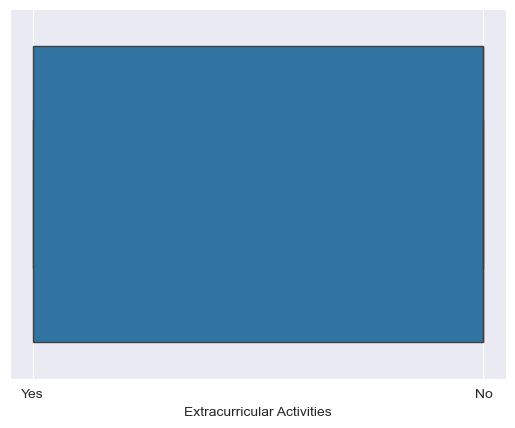

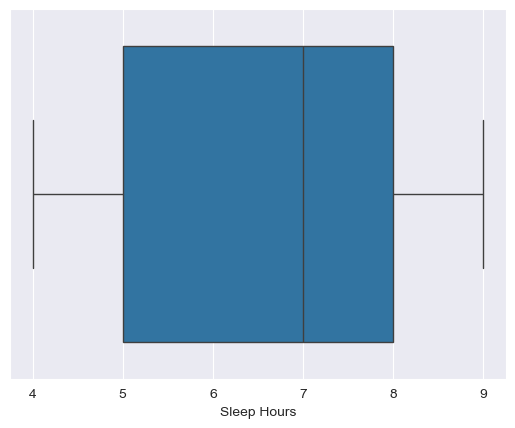

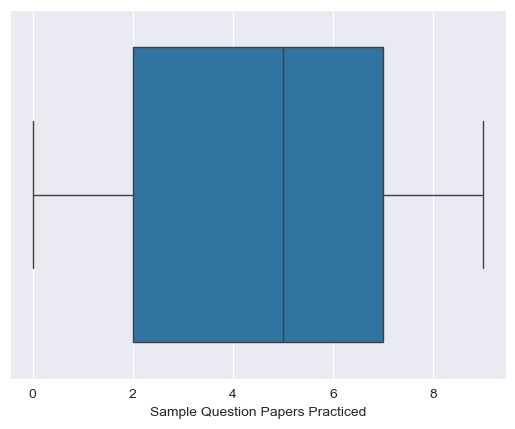

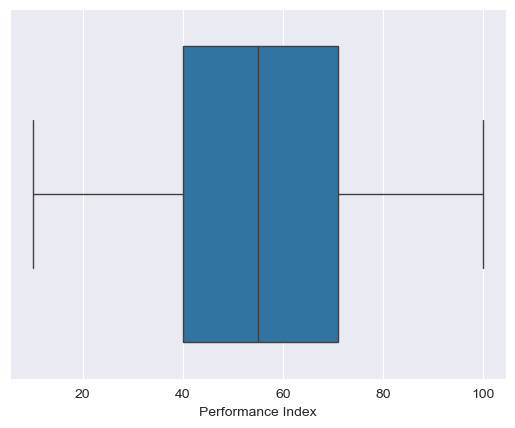

In [8]:
for col in df.columns:
    sns.boxplot(data = df, x=col)
    plt.show()

In [9]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [10]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [11]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # Ensure dense output
encoder.fit(df[['Extracurricular Activities']])
encoded_array = encoder.transform(df[['Extracurricular Activities']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Extracurricular Activities']))
df_final = pd.concat([df.drop(columns=['Extracurricular Activities']), encoded_df], axis=1)

print(df_final.head())

   Hours Studied  Previous Scores  Sleep Hours  \
0              7               99            9   
1              4               82            4   
2              8               51            7   
3              5               52            5   
4              7               75            8   

   Sample Question Papers Practiced  Performance Index  \
0                                 1               91.0   
1                                 2               65.0   
2                                 2               45.0   
3                                 2               36.0   
4                                 5               66.0   

   Extracurricular Activities_No  Extracurricular Activities_Yes  
0                            0.0                             1.0  
1                            1.0                             0.0  
2                            0.0                             1.0  
3                            0.0                             1.0  
4              

In [12]:
df_final.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800,0.505200,0.494800
std,2.589309,17.343152,1.695863,2.867348,19.212558,0.499998,0.499998
min,1.000000,40.000000,4.000000,0.000000,10.000000,0.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000,0.000000,0.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000,1.000000,0.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000,1.000000,1.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000,1.000000,1.000000


In [13]:
x = df_final.drop(columns = ['Performance Index'])
y = df_final['Performance Index']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
x_train

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_No,Extracurricular Activities_Yes
9254,5,49,7,5,1.0,0.0
1561,2,48,7,6,0.0,1.0
1670,2,81,7,2,1.0,0.0
6087,2,46,6,1,1.0,0.0
6669,8,47,9,0,1.0,0.0
...,...,...,...,...,...,...
5734,8,50,6,6,0.0,1.0
5191,4,68,9,3,1.0,0.0
5390,9,48,7,6,1.0,0.0
860,1,47,9,0,1.0,0.0


In [16]:
x_test

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_No,Extracurricular Activities_Yes
6252,5,69,8,2,1.0,0.0
4684,2,46,4,8,0.0,1.0
1731,7,56,7,5,0.0,1.0
4742,6,42,8,5,0.0,1.0
4521,7,53,4,6,1.0,0.0
...,...,...,...,...,...,...
6412,2,70,7,3,1.0,0.0
8285,4,79,9,3,1.0,0.0
7853,2,40,7,2,0.0,1.0
1095,3,83,7,5,1.0,0.0


In [17]:
y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
6412    45.0
8285    66.0
7853    16.0
1095    65.0
6929    47.0
Name: Performance Index, Length: 2000, dtype: float64

In [18]:
y_train

9254    36.0
1561    25.0
1670    59.0
6087    22.0
6669    40.0
        ... 
5734    48.0
5191    51.0
5390    44.0
860     20.0
7270    24.0
Name: Performance Index, Length: 8000, dtype: float64

In [21]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('power_transformer', PowerTransformer())
])  

cat_pipe = Pipeline([
    ('num', num_pipe),
    ('cat', CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=100))
])
num

    

    
    



NameError: name 'CatBoostRegressor' is not defined

In [19]:
cat = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=100)
cat.fit(x_train, y_train)
y_pred = cat.predict(x_test)
y_pred_proba = cat.predict_proba(x_test)

0:	learn: 4.3346561	total: 256ms	remaining: 2m 7s
100:	learn: 2.3247188	total: 18.8s	remaining: 1m 14s
200:	learn: 1.9734468	total: 27.2s	remaining: 40.5s
300:	learn: 1.7407358	total: 36.1s	remaining: 23.9s
400:	learn: 1.5674491	total: 44.2s	remaining: 10.9s
499:	learn: 1.4262130	total: 57.7s	remaining: 0us


In [20]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)



DecisionTreeClassifier()

In [30]:
dt_r = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_r.fit(x_train, y_train)

dt_preds = dt_r.predict(x_test)
#dt_rmse = mean_squared_error(y_test, dt_preds, squared=False)
#print(f"Decision Tree RMSE: {dt_rmse:.4f}")

In [31]:
rf_r = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_r.fit(x_train, y_train)

rf_preds = rf_r.predict(x_test)


In [34]:
cat_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0, random_seed=42)
cat_model.fit(x_train, y_train)

cat_preds = cat_model.predict(x_test)
#cat_rmse = mean_squared_error(y_test, cat_preds, squared=False)
#print(f"CatBoost RMSE: {cat_rmse:.4f}")

In [37]:
print(cat_preds)

[54.86507708 21.67266113 47.81513389 ... 15.57963952 63.33084932
 45.74804502]


In [38]:
print(rf_preds)

[57. 24. 45. ... 17. 65. 52.]


In [39]:
print(dt_preds)

[49.39370079 18.1641791  47.16287879 ... 18.1641791  63.43490305
 41.31683168]


In [42]:
dt_mse = mean_squared_error(y_test, dt_preds)
dt_rmse = mean_squared_error(y_test, dt_preds, squared=False)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

print(f"Decision Tree MSE: {dt_mse:.4f}")
print(f"Decision Tree RMSE: {dt_rmse:.4f}")
print(f"Decision Tree MAE: {dt_mae:.4f}")
print(f"Decision Tree R² Score: {dt_r2:.4f}")

Decision Tree MSE: 12.9870
Decision Tree RMSE: 3.6038
Decision Tree MAE: 2.9313
Decision Tree R² Score: 0.9650


In [43]:
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest MSE: {rf_mse:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.4f}")
print(f"Random Forest MAE: {rf_mae:.4f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")

Random Forest MSE: 9.7365
Random Forest RMSE: 3.1203
Random Forest MAE: 2.4615
Random Forest R² Score: 0.9737


In [44]:
cat_mse = mean_squared_error(y_test, cat_preds)
cat_rmse = mean_squared_error(y_test, cat_preds, squared=False)
cat_mae = mean_absolute_error(y_test, cat_preds)
rf_r2 = r2_score(y_test, cat_preds)

print(f"CatBoost MSE: {cat_mse:.4f}")
print(f"CatBoost RMSE: {cat_rmse:.4f}")
print(f"CatBoost MAE: {cat_mae:.4f}")
print(f"CatBoost R² Score: {rf_r2:.4f}")

CatBoost MSE: 4.2688
CatBoost RMSE: 2.0661
CatBoost MAE: 1.6457
CatBoost R² Score: 0.9885


In [46]:
def plot histoplot(y_test, preds):
    residuals = y_test - preds  # Errors

    plt.figure(figsize=(8,6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.axvline(x=0, color='red', linestyle='--', label="Zero Error")
    plt.xlabel("Residual (Error)")
    plt.ylabel("Frequency")
    plt.title("Residual Plot (Decision Tree)")
    plt.legend()
    plt.show()

SyntaxError: invalid syntax (1877408818.py, line 1)

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Plot (Decision Tree)")
plt.legend()
plt.show()

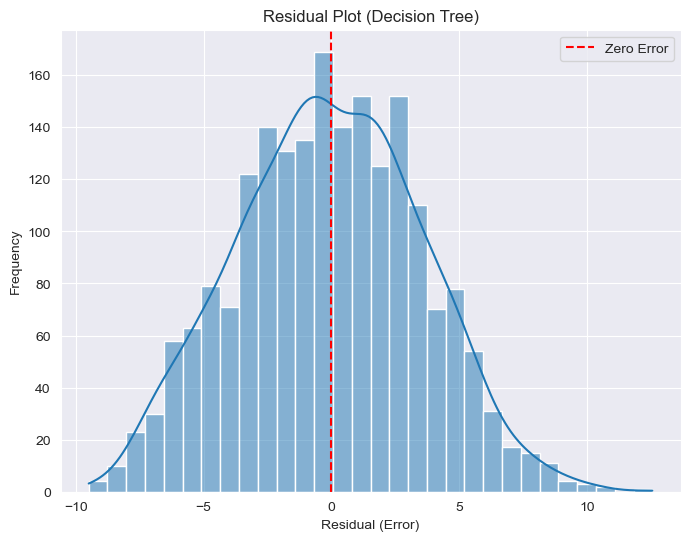

In [45]:
residuals = y_test - dt_preds  # Errors

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Plot (Decision Tree)")
plt.legend()
plt.show()


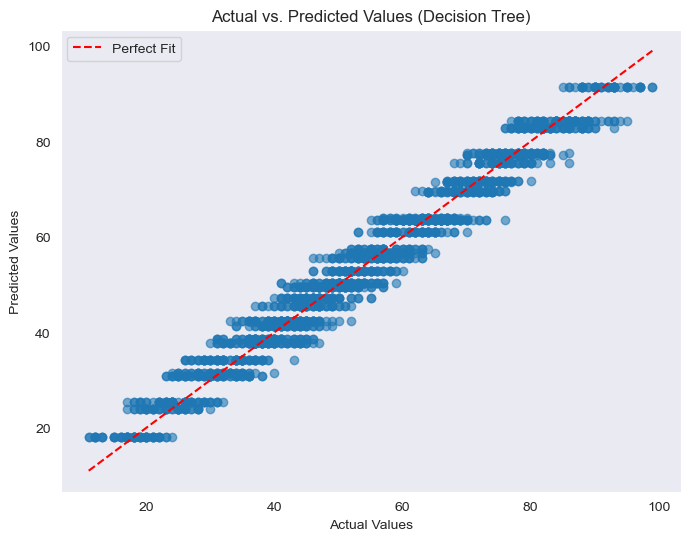

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, dt_preds, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Decision Tree)")
plt.legend()
plt.grid()
plt.show()


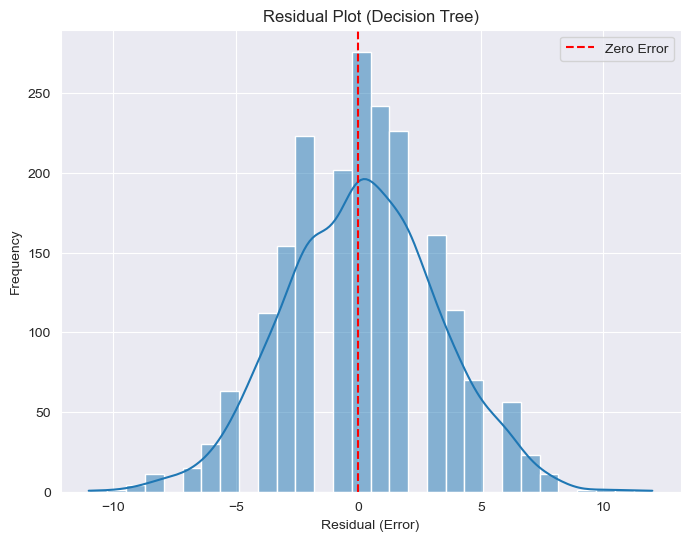

In [48]:

residuals = y_test - rf_preds  # Errors

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Plot (Decision Tree)")
plt.legend()
plt.show()


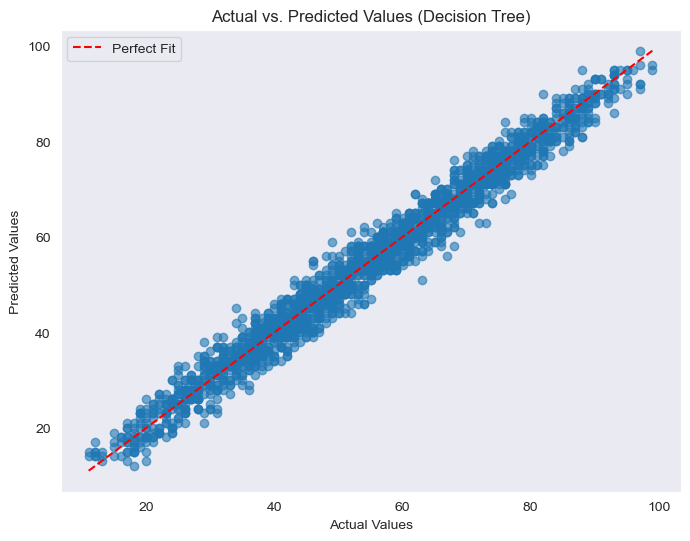

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_preds, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Decision Tree)")
plt.legend()
plt.grid()
plt.show()

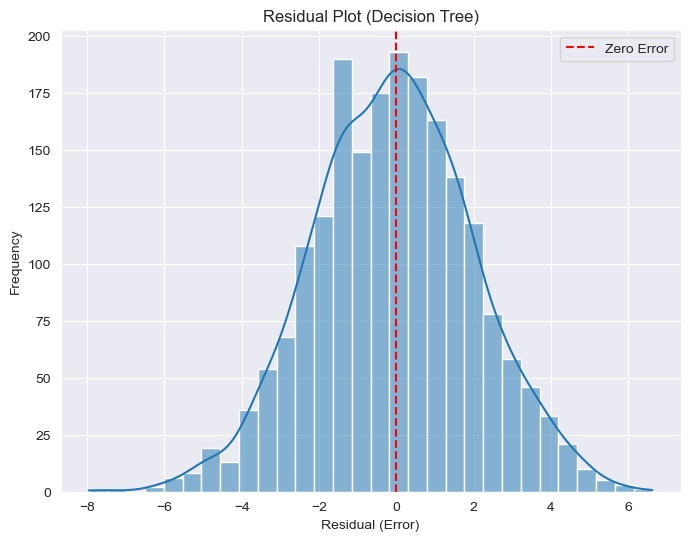

In [50]:
residuals = y_test - cat_preds  # Errors

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Plot (Decision Tree)")
plt.legend()
plt.show()

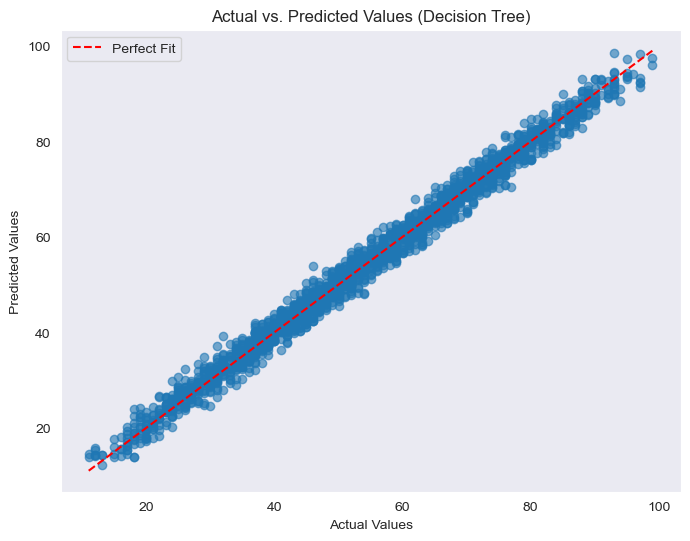

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, cat_preds, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Decision Tree)")
plt.legend()
plt.grid()
plt.show()

In [52]:
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    importance_df = pd.DataFrame(importance, index=feature_names, columns=["Importance"])
    importance_df = importance_df.sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(10,8))
    sns.barplot(x=importance_df["Importance"], y=importance_df.index)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance")
    plt.show()